In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras.datasets

In [ ]:
(X_train_full,y_train_full) , (X_test,y_test) =  tf.keras.datasets.mnist.load_data()

In [ ]:
X_train_full.shape, y_train_full.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [ ]:
X_valid, X_train = X_train_full[:5000]/255.0 , X_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000]/255.0 , y_train_full[5000:]/255.0


In [ ]:
X_valid.shape

(5000, 28, 28)

In [ ]:
y_valid.shape

(5000,)

In [ ]:
from tensorflow.keras.layers import Dense, Flatten

In [ ]:
from tensorflow.keras import Model

In [ ]:
from tensorflow.keras.models import Sequential

In [ ]:
model = Sequential()
model.add(Flatten(input_shape = (28,28), name = "InputLayer"))
model.add(Dense(64,name ="inputLayer1",activation="relu",kernel_initializer=tf.keras.initializers.HeNormal(seed=None)))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.BatchNormalization())
model.add(Dense(32,name="inputLayer2",activation="tanh",kernel_initializer=tf.keras.initializers.GlorotUniform(seed=None)))
model.add(tf.keras.layers.BatchNormalization())
model.add(Dense(16,name="inputLayer3",activation = "relu",kernel_initializer=tf.keras.initializers.HeNormal(seed=None)))
model.add(Dense(10,name ="outputLayer",activation = "softmax",kernel_initializer=tf.keras.initializers.HeNormal(seed=None)))

In [ ]:
model

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 InputLayer (Flatten)        (None, 784)               0         
                                                                 
 inputLayer1 (Dense)         (None, 64)                50240     
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 batch_normalization_4 (Bat  (None, 64)                256       
 chNormalization)                                                
                                                                 
 inputLayer2 (Dense)         (None, 32)                2080      
                                                                 
 batch_normalization_5 (Bat  (None, 32)                128       
 chNormalization)                                     

In [ ]:
## per nuron 2 trainable and 2 non trainable
# sigma, mean(mu) , gaama, beta

In [ ]:
32*4

128

In [ ]:
(256+128)/2

192.0

In [ ]:
50240 + 2080 + 528 + 170

53018

In [ ]:
50240 + 2080 + 528 + 170 + 192

53210

In [ ]:
lossFunc = "sparse_categorical_crossentropy"
## give like this
# optimizer = "SGD"
## or
## Sgd with momentum
## if simple SGD want to pass then just set momentum as zero

# sgd = tf.keras.optimizers.SGD(
#     learning_rate=0.02, momentum= 0.9,
# )

##Adam
adam = tf.keras.optimizers.Adam(
    learning_rate=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-07
)

metrics = ["accuracy"]

optimizer = adam
model.compile(loss=lossFunc, optimizer=optimizer, metrics= metrics)

In [ ]:
validation_set = (X_valid,y_valid)
history = model.fit(X_train,y_train,batch_size=32,epochs=5,validation_data=validation_set,use_multiprocessing=True)

Epoch 1/5
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0115 - accuracy: 0.0987 - val_loss: 2.6977e-06 - val_accuracy: 0.0958
Epoch 2/5
1719/1719 [==============================] - 8s 5ms/step - loss: 3.3464e-06 - accuracy: 0.0990 - val_loss: 5.4209e-07 - val_accuracy: 0.0958
Epoch 3/5
1719/1719 [==============================] - 8s 5ms/step - loss: 8.9055e-07 - accuracy: 0.0990 - val_loss: 1.5042e-07 - val_accuracy: 0.0958
Epoch 4/5
1719/1719 [==============================] - 7s 4ms/step - loss: 3.2066e-07 - accuracy: 0.0990 - val_loss: 4.3392e-08 - val_accuracy: 0.0958
Epoch 5/5
1719/1719 [==============================] - 8s 5ms/step - loss: 9.9844e-08 - accuracy: 0.0990 - val_loss: 9.7036e-09 - val_accuracy: 0.0958


In [ ]:
modelInfo = pd.DataFrame(history.history)

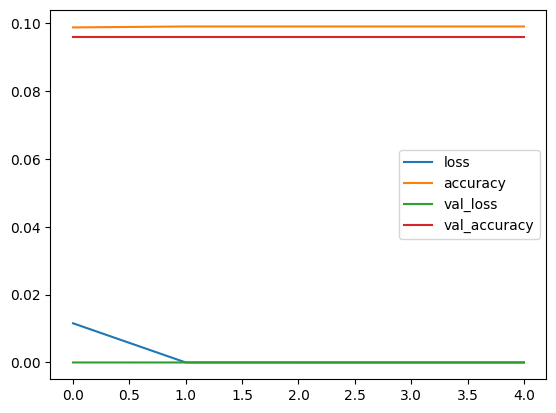

In [ ]:
modelInfo.plot()
plt.show()

In [ ]:
X_test[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  84, 185, 159, 151,  60,  36,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 222, 254, 254, 254, 254, 241, 198,
        198, 198, 198, 198, 198, 198, 198, 170,  52,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  67, 114,  72, 114, 163, 227, 254,
        225, 254, 254, 254, 250, 229, 254, 254, 140,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  17,  66,
         14,  67,  67,  67,  59,  21, 236, 254, 106,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,  83, 253, 209,  18,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,  22, 233, 255,  83,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 129, 254, 238,  44,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,  59, 249, 254,  62,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0, 133, 254, 187,   5,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   9, 205, 248,  58,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0, 126, 254, 182,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  75, 251, 240,  57,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         19, 221, 254, 166,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
        203, 254, 219,  35,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  38,
        254, 254,  77,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  31, 224,
        254, 115,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 133, 254,
        254,  52,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

In [ ]:
model.evaluate(X_test, y_test, batch_size = 64, use_multiprocessing=True)

157/157 [==============================] - 1s 2ms/step - loss: 18.6180 - accuracy: 0.0980


[18.61802101135254, 0.09799999743700027]

In [ ]:
model.predict(X_test)

313/313 [==============================] - 1s 4ms/step


array([[9.9999982e-01, 8.9965042e-08, 2.3828668e-09, ..., 1.0733091e-09,
        1.3251973e-10, 2.1176241e-09],
       [9.9999994e-01, 6.2325874e-12, 4.5932144e-11, ..., 3.8656093e-15,
        2.2412142e-12, 1.4908692e-10],
       [9.9999994e-01, 1.2052476e-12, 6.9631634e-11, ..., 1.2751477e-13,
        9.6478459e-12, 1.2510801e-10],
       ...,
       [9.9994606e-01, 8.3980822e-06, 2.2387551e-06, ..., 1.1784254e-06,
        7.5921912e-07, 9.3306289e-06],
       [9.9647307e-01, 9.2582894e-04, 1.0685412e-03, ..., 8.1411934e-05,
        2.3920905e-04, 2.3455044e-05],
       [9.9999648e-01, 3.2144737e-08, 2.7729477e-06, ..., 2.2677660e-10,
        9.3923802e-08, 3.2079244e-09]], dtype=float32)

In [ ]:
X_test[0].reshape(1,28,28).shape

(1, 28, 28)

In [ ]:
model.predict(X_test[0].reshape(1,28,28))

1/1 [==============================] - 0s 25ms/step


array([[9.9999988e-01, 8.9965042e-08, 2.3828670e-09, 8.5577796e-08,
        2.0918943e-10, 5.1749778e-11, 5.1981242e-08, 1.0733071e-09,
        1.3251975e-10, 2.1176241e-09]], dtype=float32)

In [ ]:
np.argmax(model.predict(X_test[0].reshape(1,28,28)))

1/1 [==============================] - 0s 35ms/step


0

In [ ]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 InputLayer (Flatten)        (None, 784)               0         
                                                                 
 inputLayer1 (Dense)         (None, 64)                50240     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 inputLayer2 (Dense)         (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 inputLayer3 (Dense)         (None, 16)                528       
                                                                 
 dropout_2 (Dropout)         (None, 16)                0

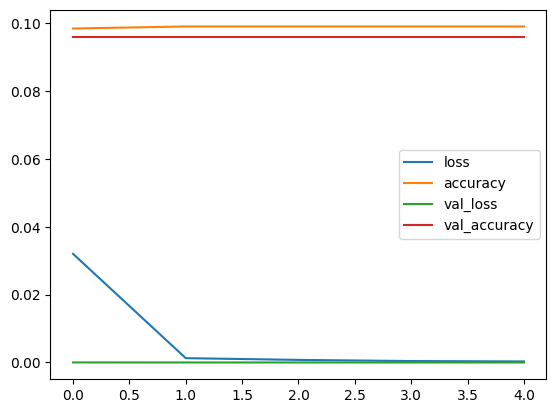

313/313 [==============================] - 1s 2ms/step - loss: 6865.3271 - accuracy: 0.0980


[6865.3271484375, 0.09799999743700027]

In [ ]:
(X_train_full,y_train_full) , (X_test,y_test) =  tf.keras.datasets.mnist.load_data()

X_valid, X_train = X_train_full[:5000]/255.0 , X_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000]/255.0 , y_train_full[5000:]/255.0


model = Sequential()
model.add(Flatten(input_shape = (28,28), name = "InputLayer"))
model.add(Dense(64,name ="inputLayer1",activation="relu",kernel_initializer=tf.keras.initializers.HeNormal(seed=None)))
model.add(tf.keras.layers.Dropout(0.2))
model.add(Dense(32,name="inputLayer2",activation="relu",kernel_initializer=tf.keras.initializers.HeNormal(seed=None)))
model.add(tf.keras.layers.Dropout(0.1))
model.add(Dense(16,name="inputLayer3",activation="relu",kernel_initializer=tf.keras.initializers.HeNormal(seed=None)))
model.add(tf.keras.layers.Dropout(0.1))
model.add(Dense(10,name ="outputLayer",activation = "softmax"))

print(model.summary())

lossFunc = "sparse_categorical_crossentropy"
## give like this
optimizer = "SGD"
## or
## Sgd with momentum
## if simple SGD want to pass then just set momentum as zero

sgd = tf.keras.optimizers.SGD(
    learning_rate=0.01, momentum= 0.9,
)

##Adam
# adam = tf.keras.optimizers.Adam(
#     learning_rate=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-07
# )

metrics = ["accuracy"]

# optimizer = adam

model.compile(loss=lossFunc, optimizer=optimizer, metrics= metrics)

validation_set = (X_valid,y_valid)
history = model.fit(X_train,y_train,batch_size=32,epochs=5,validation_data=validation_set,use_multiprocessing=True)

modelInfo = pd.DataFrame(history.history)
modelInfo.plot()
plt.show()

model.evaluate(X_test, y_test)